## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [5]:
import os
import keras
from keras.datasets import cifar10
# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
num_classes = 10

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [8]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [9]:

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [14]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.gradient_descent_v2.SGD(learning_rate=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


2021-11-18 16:16:25.060157: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50
196/196 [==============================] - 3s 16ms/step - loss: 2.0476 - accuracy: 0.2473 - val_loss: 1.9558 - val_accuracy: 0.2979
Epoch 2/50
196/196 [==============================] - 3s 16ms/step - loss: 1.8450 - accuracy: 0.3293 - val_loss: 1.7949 - val_accuracy: 0.3540
Epoch 3/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7814 - accuracy: 0.3568 - val_loss: 1.8103 - val_accuracy: 0.3531
Epoch 4/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7308 - accuracy: 0.3755 - val_loss: 1.7916 - val_accuracy: 0.3593
Epoch 5/50
196/196 [==============================] - 3s 17ms/step - loss: 1.7084 - accuracy: 0.3872 - val_loss: 1.7390 - val_accuracy: 0.3845
Epoch 6/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6907 - accuracy: 0.3955 - val_loss: 1.8735 - val_accuracy: 0.3422
Epoch 7/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6594 - accuracy: 0.4052 - val_loss: 1.7006 - val_accuracy: 0.3895

2021-11-18 16:19:00.190861: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50
196/196 [==============================] - 4s 18ms/step - loss: 1.8347 - accuracy: 0.3418 - val_loss: 1.6400 - val_accuracy: 0.4224
Epoch 2/50
196/196 [==============================] - 3s 16ms/step - loss: 1.5985 - accuracy: 0.4321 - val_loss: 1.6256 - val_accuracy: 0.4203
Epoch 3/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5160 - accuracy: 0.4610 - val_loss: 1.5500 - val_accuracy: 0.4514
Epoch 4/50
196/196 [==============================] - 3s 17ms/step - loss: 1.4540 - accuracy: 0.4839 - val_loss: 1.5356 - val_accuracy: 0.4484
Epoch 5/50
196/196 [==============================] - 3s 17ms/step - loss: 1.4080 - accuracy: 0.4989 - val_loss: 1.5278 - val_accuracy: 0.4516
Epoch 6/50
196/196 [==============================] - 3s 15ms/step - loss: 1.3636 - accuracy: 0.5153 - val_loss: 1.4254 - val_accuracy: 0.4932
Epoch 7/50
196/196 [==============================] - 3s 16ms/step - loss: 1.3310 - accuracy: 0.5245 - val_loss: 1.3848 - val_accuracy: 0.5044

2021-11-18 16:21:41.789213: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50
196/196 [==============================] - 3s 16ms/step - loss: 2.0199 - accuracy: 0.2751 - val_loss: 1.8722 - val_accuracy: 0.3439
Epoch 2/50
196/196 [==============================] - 3s 15ms/step - loss: 1.8085 - accuracy: 0.3661 - val_loss: 1.7581 - val_accuracy: 0.3800
Epoch 3/50
196/196 [==============================] - 3s 15ms/step - loss: 1.7210 - accuracy: 0.4001 - val_loss: 1.6919 - val_accuracy: 0.4042
Epoch 4/50
196/196 [==============================] - 3s 15ms/step - loss: 1.6604 - accuracy: 0.4215 - val_loss: 1.6447 - val_accuracy: 0.4241
Epoch 5/50
196/196 [==============================] - 3s 15ms/step - loss: 1.6117 - accuracy: 0.4377 - val_loss: 1.6037 - val_accuracy: 0.4352
Epoch 6/50
196/196 [==============================] - 3s 15ms/step - loss: 1.5695 - accuracy: 0.4514 - val_loss: 1.5822 - val_accuracy: 0.4379
Epoch 7/50
196/196 [==============================] - 3s 15ms/step - loss: 1.5366 - accuracy: 0.4621 - val_loss: 1.5379 - val_accuracy: 0.4579

2021-11-18 16:24:28.547380: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50
196/196 [==============================] - 4s 17ms/step - loss: 2.2435 - accuracy: 0.1809 - val_loss: 2.1697 - val_accuracy: 0.2402
Epoch 2/50
196/196 [==============================] - 3s 15ms/step - loss: 2.1241 - accuracy: 0.2502 - val_loss: 2.0806 - val_accuracy: 0.2665
Epoch 3/50
196/196 [==============================] - 3s 16ms/step - loss: 2.0481 - accuracy: 0.2751 - val_loss: 2.0165 - val_accuracy: 0.2917
Epoch 4/50
196/196 [==============================] - 3s 16ms/step - loss: 1.9931 - accuracy: 0.2961 - val_loss: 1.9683 - val_accuracy: 0.3060
Epoch 5/50
196/196 [==============================] - 3s 15ms/step - loss: 1.9499 - accuracy: 0.3120 - val_loss: 1.9303 - val_accuracy: 0.3204
Epoch 6/50
196/196 [==============================] - 3s 16ms/step - loss: 1.9157 - accuracy: 0.3256 - val_loss: 1.9003 - val_accuracy: 0.3395
Epoch 7/50
196/196 [==============================] - 3s 17ms/step - loss: 1.8881 - accuracy: 0.3384 - val_loss: 1.8755 - val_accuracy: 0.3451

Epoch 1/50
196/196 [==============================] - 4s 17ms/step - loss: 2.3357 - accuracy: 0.1082 - val_loss: 2.3061 - val_accuracy: 0.1128
Epoch 2/50
196/196 [==============================] - 3s 15ms/step - loss: 2.2876 - accuracy: 0.1189 - val_loss: 2.2752 - val_accuracy: 0.1250
Epoch 3/50
196/196 [==============================] - 3s 15ms/step - loss: 2.2627 - accuracy: 0.1440 - val_loss: 2.2536 - val_accuracy: 0.1539
Epoch 4/50
196/196 [==============================] - 3s 16ms/step - loss: 2.2435 - accuracy: 0.1646 - val_loss: 2.2364 - val_accuracy: 0.1735
Epoch 5/50
196/196 [==============================] - 3s 15ms/step - loss: 2.2274 - accuracy: 0.1815 - val_loss: 2.2212 - val_accuracy: 0.1891
Epoch 6/50
196/196 [==============================] - 3s 15ms/step - loss: 2.2128 - accuracy: 0.1942 - val_loss: 2.2072 - val_accuracy: 0.2005
Epoch 7/50
196/196 [==============================] - 3s 15ms/step - loss: 2.1992 - accuracy: 0.2059 - val_loss: 2.1941 - val_accuracy: 0.2099

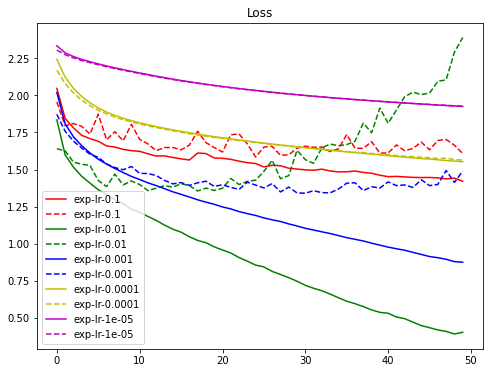

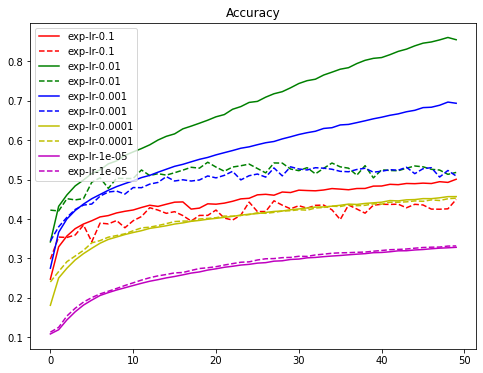

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現